In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

https://towardsdatascience.com/the-complete-guide-for-topics-extraction-in-python-a6aaa6cedbbc
https://github.com/FelixChop/MediumArticles/blob/master/LDA-BBC.ipynb

https://www.machinelearningplus.com/nlp/gensim-tutorial/

https://www.machinelearningplus.com/nlp/topic-modeling-python-sklearn-examples/

https://www.machinelearningplus.com/nlp/topic-modeling-visualization-how-to-present-results-lda-models/

https://medium.com/analytics-vidhya/an-nlp-approach-to-mining-online-reviews-using-topic-modeling-with-python-codes-9d766e783003  --- easy way to understand.

https://medium.com/analytics-vidhya/text-mining-101-a-stepwise-introduction-to-topic-modeling-using-latent-semantic-analysis-using-add9c905efd9

https://towardsdatascience.com/nlp-for-topic-modeling-summarization-of-legal-documents-8c89393b1534 --- just to read only. Summurize the text according to requirement.

https://towardsdatascience.com/when-topic-modeling-is-part-of-the-text-pre-processing-294b58d35514 -- topic modleing for preprocessing like remove duplicates and remove irrelevent words like "smoking"from hotel descriptions.

https://www.kaggle.com/akashram/topic-modeling-intro-implementation -- theoritical Explanation.

https://www.kaggle.com/canggih/topic-modeling -- very simple and easy implementation in 5 steps

https://towardsdatascience.com/short-text-topic-modeling-70e50a57c883 -- TOPIC MODELING on short text using STTM.

https://blog.mlreview.com/topic-modeling-with-scikit-learn-e80d33668730 -- simply executed topic modeling using sklearn.

https://towardsdatascience.com/unsupervised-nlp-topic-models-as-a-supervised-learning-input-cf8ee9e5cf28 -- LDA used for classification.

https://gist.github.com/patrickvankessel/0d5bd690910edece831dbdf32fb2fb2d -- semi-supervised learning to get sense of good words in topics.

## Topic Modeling

A type of statistical model for discovering the abstract "topics" that occur in a collection of documents. A document typically concerns multiple topics in different proportions; thus, in a document that is 10% about cats and 90% about dogs, there would probably be about 9 times more dog words than cat words. The "topics" produced by topic modeling techniques are clusters of similar words. A topic model captures this intuition in a mathematical framework, which allows examining a set of documents and discovering, based on the statistics of the words in each, what the topics might be and what each document's balance of topics is.

After the topic modeling, we can get the clustures of topic which have different group of words. Its like filter/segment the text through topic modeling when we dont have labels. TOpic modeling is also used in google search.

example - The fourth topic Topic 3 has terms like ‘towel’, ‘clean’, ‘wax’, ‘water’, indicating that the topic is very much related to car-wash. Similarly, Topic 6 seems to be about the overall value of the product as it has terms like ‘price’, ‘quality’, and ‘worth’.


#### Apart from topic modeling, there are many other NLP methods as well which are used for analyzing and understanding online reviews. Some of them are listed below:

Text Summarization: Summarize the reviews into a paragraph or a few bullet points.

Entity Recognition: Extract entities from the reviews and identify which products are most popular (or unpopular) among the consumers.

Identify Emerging Trends: Based on the timestamp of the reviews, new and emerging topics or entities can be identified. It would enable us to figure out which products are becoming popular and which are losing their grip on the market.

Sentiment Analysis: For retailers, understanding the sentiment of the reviews can be helpful in improving their products and services.


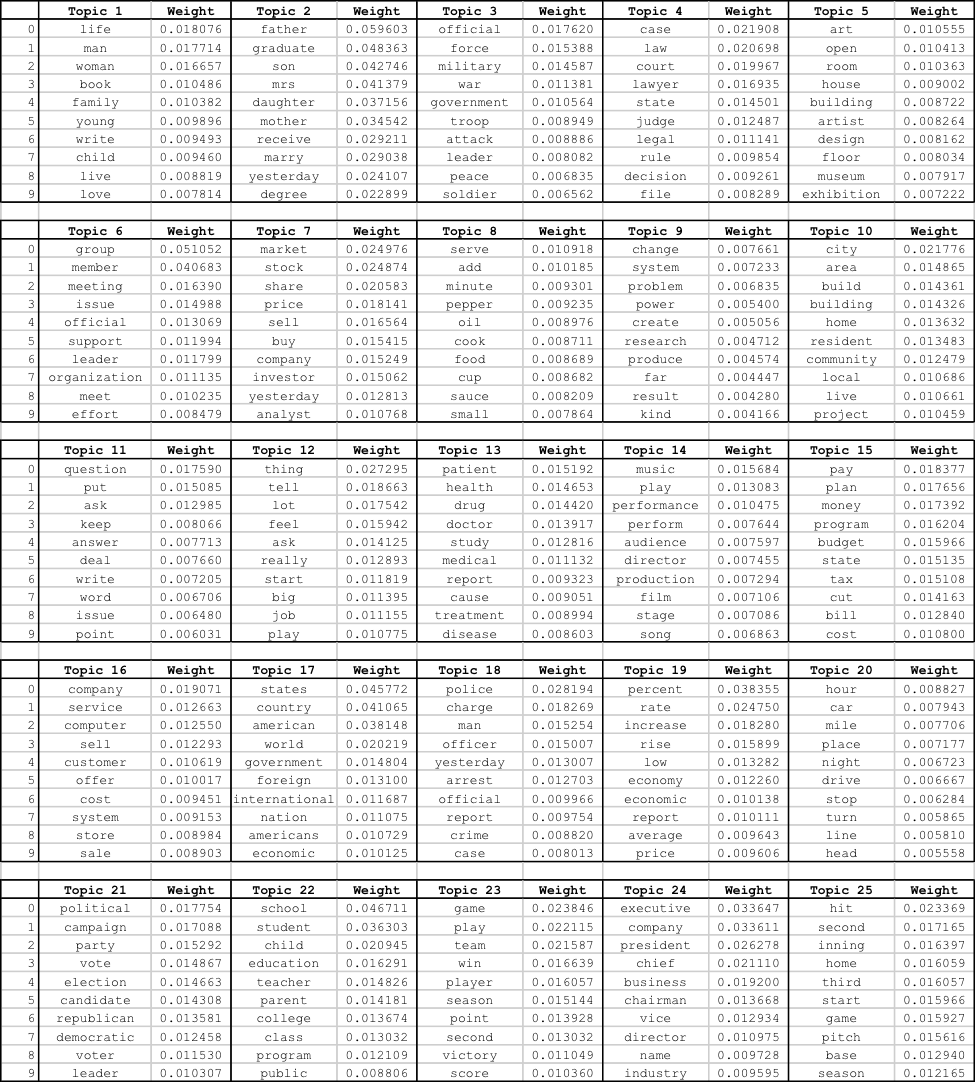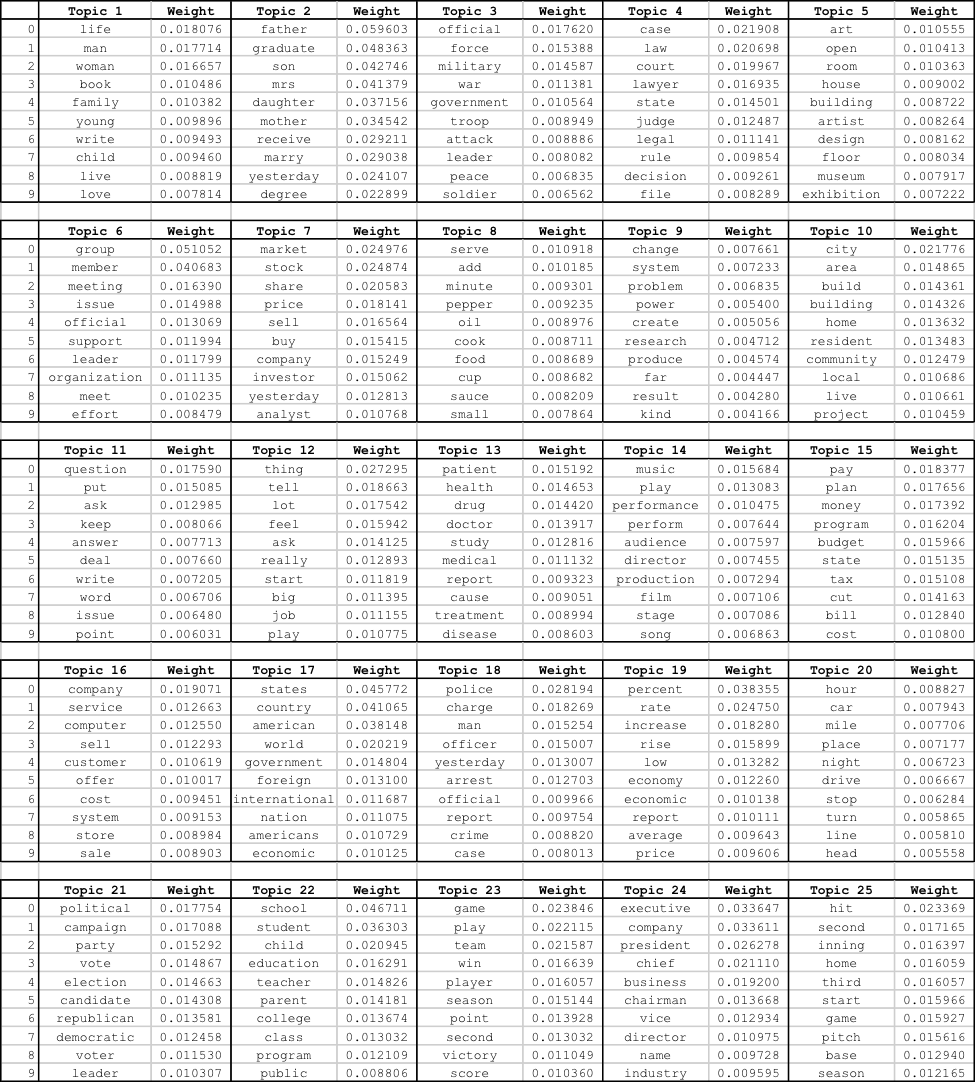

In [10]:
import pandas as pd

data = pd.read_csv(r'https://raw.githubusercontent.com/FelixChop/MediumArticles/master/articles_bbc_2018_01_30.csv')
data.head()

,articles,lang
0,Image copyright PA/EPA Image caption Oligarch ...,en
1,Husband admits killing French jogger\r\n\r\nTh...,en
2,Media playback is unsupported on your device M...,en
3,Manchester City's Leroy Sane is ruled out for ...,en
4,Image copyright AFP Image caption Sebastien Br...,en


In [11]:
data.shape
data = data.dropna().reset_index(drop=True)
data.shape

(308, 2)

In [14]:
from langdetect import detect
from tqdm import tqdm_notebook
tqdm_notebook().pandas()

data['lang'] = data.articles.progress_map(detect)


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  This is separate from the ipykernel package so we can avoid doing imports until


0it [00:00, ?it/s]

  0%|          | 0/308 [00:00<?, ?it/s]

In [15]:
data.lang.value_counts()

en    256
fa      9
fr      8
id      5
vi      4
hi      4
ar      4
uk      4
ru      4
sw      3
pt      2
es      2
tr      2
de      1
Name: lang, dtype: int64

In [16]:
data = data.loc[data.lang=='en']

In [17]:
from nltk.tokenize import sent_tokenize

data['sentences'] = data.articles.progress_map(sent_tokenize)
data['sentences'].head(1).tolist()[0][:3] # Print the first 3 sentences of the 1st article

  0%|          | 0/256 [00:00<?, ?it/s]

['Image copyright PA/EPA Image caption Oligarch Roman Abramovich (l) and PM Dmitry Medvedev are on the list\r\n\r\nRussian President Vladimir Putin says a list of officials and businessmen close to the Kremlin published by the US has in effect targeted all Russian people.',
 'The list names 210 top Russians as part of a sanctions law aimed at punishing Moscow for meddling in the US election.',
 'However, the US stressed those named were not subject to new sanctions.']

In [18]:
from nltk.tokenize import word_tokenize
data['tokens_sentences'] = data['sentences'].progress_map(lambda sentences: [word_tokenize(sentence) for sentence in sentences])
print(data['tokens_sentences'].head(1).tolist()[0][:3])
data.head()

  0%|          | 0/256 [00:00<?, ?it/s]

[['Image', 'copyright', 'PA/EPA', 'Image', 'caption', 'Oligarch', 'Roman', 'Abramovich', '(', 'l', ')', 'and', 'PM', 'Dmitry', 'Medvedev', 'are', 'on', 'the', 'list', 'Russian', 'President', 'Vladimir', 'Putin', 'says', 'a', 'list', 'of', 'officials', 'and', 'businessmen', 'close', 'to', 'the', 'Kremlin', 'published', 'by', 'the', 'US', 'has', 'in', 'effect', 'targeted', 'all', 'Russian', 'people', '.'], ['The', 'list', 'names', '210', 'top', 'Russians', 'as', 'part', 'of', 'a', 'sanctions', 'law', 'aimed', 'at', 'punishing', 'Moscow', 'for', 'meddling', 'in', 'the', 'US', 'election', '.'], ['However', ',', 'the', 'US', 'stressed', 'those', 'named', 'were', 'not', 'subject', 'to', 'new', 'sanctions', '.']]


,articles,lang,sentences,tokens_sentences
0,Image copyright PA/EPA Image caption Oligarch ...,en,[Image copyright PA/EPA Image caption Oligarch...,"[[Image, copyright, PA/EPA, Image, caption, Ol..."
1,Husband admits killing French jogger\r\n\r\nTh...,en,[Husband admits killing French jogger\r\n\r\nT...,"[[Husband, admits, killing, French, jogger, Th..."
2,Media playback is unsupported on your device M...,en,[Media playback is unsupported on your device ...,"[[Media, playback, is, unsupported, on, your, ..."
3,Manchester City's Leroy Sane is ruled out for ...,en,[Manchester City's Leroy Sane is ruled out for...,"[[Manchester, City, 's, Leroy, Sane, is, ruled..."
4,Image copyright AFP Image caption Sebastien Br...,en,[Image copyright AFP Image caption Sebastien B...,"[[Image, copyright, AFP, Image, caption, Sebas..."


In [19]:
from nltk import pos_tag

data['POS_tokens'] = data['tokens_sentences'].progress_map(lambda tokens_sentences: [pos_tag(tokens) for tokens in tokens_sentences])
print(data['POS_tokens'].head(1).tolist()[0][:3])
data.head()

  0%|          | 0/256 [00:00<?, ?it/s]

[[('Image', 'NN'), ('copyright', 'NN'), ('PA/EPA', 'NNP'), ('Image', 'NNP'), ('caption', 'NN'), ('Oligarch', 'NNP'), ('Roman', 'NNP'), ('Abramovich', 'NNP'), ('(', '('), ('l', 'NN'), (')', ')'), ('and', 'CC'), ('PM', 'NNP'), ('Dmitry', 'NNP'), ('Medvedev', 'NNP'), ('are', 'VBP'), ('on', 'IN'), ('the', 'DT'), ('list', 'NN'), ('Russian', 'NNP'), ('President', 'NNP'), ('Vladimir', 'NNP'), ('Putin', 'NNP'), ('says', 'VBZ'), ('a', 'DT'), ('list', 'NN'), ('of', 'IN'), ('officials', 'NNS'), ('and', 'CC'), ('businessmen', 'NNS'), ('close', 'RB'), ('to', 'TO'), ('the', 'DT'), ('Kremlin', 'NNP'), ('published', 'VBN'), ('by', 'IN'), ('the', 'DT'), ('US', 'NNP'), ('has', 'VBZ'), ('in', 'IN'), ('effect', 'NN'), ('targeted', 'VBN'), ('all', 'DT'), ('Russian', 'JJ'), ('people', 'NNS'), ('.', '.')], [('The', 'DT'), ('list', 'NN'), ('names', 'RB'), ('210', 'CD'), ('top', 'JJ'), ('Russians', 'NNPS'), ('as', 'IN'), ('part', 'NN'), ('of', 'IN'), ('a', 'DT'), ('sanctions', 'NNS'), ('law', 'NN'), ('aimed', 

,articles,lang,sentences,tokens_sentences,POS_tokens
0,Image copyright PA/EPA Image caption Oligarch ...,en,[Image copyright PA/EPA Image caption Oligarch...,"[[Image, copyright, PA/EPA, Image, caption, Ol...","[[(Image, NN), (copyright, NN), (PA/EPA, NNP),..."
1,Husband admits killing French jogger\r\n\r\nTh...,en,[Husband admits killing French jogger\r\n\r\nT...,"[[Husband, admits, killing, French, jogger, Th...","[[(Husband, NNP), (admits, VBZ), (killing, VBG..."
2,Media playback is unsupported on your device M...,en,[Media playback is unsupported on your device ...,"[[Media, playback, is, unsupported, on, your, ...","[[(Media, NNP), (playback, NN), (is, VBZ), (un..."
3,Manchester City's Leroy Sane is ruled out for ...,en,[Manchester City's Leroy Sane is ruled out for...,"[[Manchester, City, 's, Leroy, Sane, is, ruled...","[[(Manchester, NNP), (City, NNP), ('s, POS), (..."
4,Image copyright AFP Image caption Sebastien Br...,en,[Image copyright AFP Image caption Sebastien B...,"[[Image, copyright, AFP, Image, caption, Sebas...","[[(Image, NN), (copyright, NN), (AFP, NNP), (I..."


In [20]:
# Inspired from https://stackoverflow.com/a/15590384
from nltk.corpus import wordnet

def get_wordnet_pos(treebank_tag):

    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return ''

from nltk.stem.wordnet import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()


# Lemmatizing each word with its POS tag, in each sentence
data['tokens_sentences_lemmatized'] = data['POS_tokens'].progress_map(
    lambda list_tokens_POS: [
        [
            lemmatizer.lemmatize(el[0], get_wordnet_pos(el[1])) 
            if get_wordnet_pos(el[1]) != '' else el[0] for el in tokens_POS
        ] 
        for tokens_POS in list_tokens_POS
    ]
)

data['tokens_sentences_lemmatized'].head(1).tolist()[0][:3]

  0%|          | 0/256 [00:00<?, ?it/s]

[['Image',
  'copyright',
  'PA/EPA',
  'Image',
  'caption',
  'Oligarch',
  'Roman',
  'Abramovich',
  '(',
  'l',
  ')',
  'and',
  'PM',
  'Dmitry',
  'Medvedev',
  'be',
  'on',
  'the',
  'list',
  'Russian',
  'President',
  'Vladimir',
  'Putin',
  'say',
  'a',
  'list',
  'of',
  'official',
  'and',
  'businessmen',
  'close',
  'to',
  'the',
  'Kremlin',
  'publish',
  'by',
  'the',
  'US',
  'have',
  'in',
  'effect',
  'target',
  'all',
  'Russian',
  'people',
  '.'],
 ['The',
  'list',
  'names',
  '210',
  'top',
  'Russians',
  'as',
  'part',
  'of',
  'a',
  'sanction',
  'law',
  'aim',
  'at',
  'punish',
  'Moscow',
  'for',
  'meddle',
  'in',
  'the',
  'US',
  'election',
  '.'],
 ['However',
  ',',
  'the',
  'US',
  'stress',
  'those',
  'name',
  'be',
  'not',
  'subject',
  'to',
  'new',
  'sanction',
  '.']]

In [21]:
# Downloads the data.
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords_verbs = ['say', 'get', 'go', 'know', 'may', 'need', 'like', 'make', 'see', 'want', 'come', 'take', 'use', 'would', 'can']
stopwords_other = ['one', 'mr', 'bbc', 'image', 'getty', 'de', 'en', 'caption', 'also', 'copyright', 'something']
my_stopwords = stopwords.words('english') + stopwords_verbs + stopwords_other

from itertools import chain # to flatten list of sentences of tokens into list of tokens

data['tokens'] = data['tokens_sentences_lemmatized'].map(lambda sentences: list(chain.from_iterable(sentences)))
data['tokens'] = data['tokens'].map(lambda tokens: [token.lower() for token in tokens if token.isalpha() 
                                                    and token.lower() not in my_stopwords and len(token)>1])


data['tokens'].head(1).tolist()[0][:30]

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['oligarch',
 'roman',
 'abramovich',
 'pm',
 'dmitry',
 'medvedev',
 'list',
 'russian',
 'president',
 'vladimir',
 'putin',
 'list',
 'official',
 'businessmen',
 'close',
 'kremlin',
 'publish',
 'us',
 'effect',
 'target',
 'russian',
 'people',
 'list',
 'names',
 'top',
 'russians',
 'part',
 'sanction',
 'law',
 'aim']

In [ ]:
data.head()

In [22]:
from gensim.models import Phrases

tokens = data['tokens'].tolist()
bigram_model = Phrases(tokens)
trigram_model = Phrases(bigram_model[tokens], min_count=1)
tokens = list(trigram_model[bigram_model[tokens]])
tokens[0][:10]

['oligarch',
 'roman_abramovich',
 'pm_dmitry',
 'medvedev_list',
 'russian_president',
 'vladimir_putin',
 'list',
 'official',
 'businessmen',
 'close']

In [ ]:
from gensim import corpora, models
import numpy as np

dictionary_LDA = corpora.Dictionary(tokens) # make dictionary

# Show the word to id map
# print(dictionary_LDA.token2id)

dictionary_LDA.filter_extremes(no_below=3)
corpus = [dictionary_LDA.doc2bow(tok) for tok in tokens] 

# [[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1)], [(4, 4)]] 
# The (0, 1) in line 1 means, the word with id=0 appears once in the 1st document.
# Likewise, the (4, 4) in the second list item means the word with id 4 appears 4 times in the second documents.

np.random.seed(123456)
num_topics = 20
%time lda_model = models.LdaModel(corpus, num_topics=num_topics, \
                                  id2word=dictionary_LDA, \
                                  passes=4, alpha=[0.01]*num_topics, \
                                  eta=[0.01]*len(dictionary_LDA.keys()))

In [ ]:
for i,topic in lda_model.show_topics(formatted=True, num_topics=num_topics, num_words=20):
    print(str(i)+": "+ topic)
    print()

In [ ]:
print(data.articles.loc[0][:500])

In [ ]:
lda_model[corpus[0]]

In [ ]:

document = '''Eric Tucker, a 35-year-old co-founder of a marketing company in Austin, Tex., had just about 40 Twitter followers. But his recent tweet about paid protesters being bused to demonstrations against President-elect Donald J. Trump fueled a nationwide conspiracy theory — one that Mr. Trump joined in promoting. 

Mr. Tucker's post was shared at least 16,000 times on Twitter and more than 350,000 times on Facebook. The problem is that Mr. Tucker got it wrong. There were no such buses packed with paid protesters.

But that didn't matter.

While some fake news is produced purposefully by teenagers in the Balkans or entrepreneurs in the United States seeking to make money from advertising, false information can also arise from misinformed social media posts by regular people that are seized on and spread through a hyperpartisan blogosphere.

Here, The New York Times deconstructs how Mr. Tucker’s now-deleted declaration on Twitter the night after the election turned into a fake-news phenomenon. It is an example of how, in an ever-connected world where speed often takes precedence over truth, an observation by a private citizen can quickly become a talking point, even as it is being proved false.'''
tokens = word_tokenize(document)
topics = lda_model.show_topics(formatted=True, num_topics=num_topics, num_words=20)
pd.DataFrame([(el[0], round(el[1],2), topics[el[0]][1]) for el in lda_model[dictionary_LDA.doc2bow(tokens)]], columns=['topic #', 'weight', 'words in topic'])

In [ ]:
topics = [lda_model[corpus[i]] for i in range(len(data))]

def topics_document_to_dataframe(topics_document, num_topics):
    res = pd.DataFrame(columns=range(num_topics))
    for topic_weight in topics_document:
        res.loc[0, topic_weight[0]] = topic_weight[1]
    return res

topics_document_to_dataframe([(9, 0.03853655432967504), (15, 0.09130117862212643), (18, 0.8692868808484044)], 20)

# Like TF-IDF, create a matrix of topic weighting, with documents as rows and topics as columns
document_topic = \
pd.concat([topics_document_to_dataframe(topics_document, num_topics=num_topics) for topics_document in topics]) \
  .reset_index(drop=True).fillna(0)

document_topic.head()

# Which document are about topic 14
document_topic.sort_values(14, ascending=False)[14].head(20)                               
                                 

In [ ]:
print(data.articles.loc[91][:1000])

In [ ]:
%matplotlib inline
import seaborn as sns; sns.set(rc={'figure.figsize':(10,20)})
sns.heatmap(document_topic.loc[document_topic.idxmax(axis=1).sort_values().index])

In [ ]:
sns.set(rc={'figure.figsize':(10,5)})
document_topic.idxmax(axis=1).value_counts().plot.bar(color='lightblue')

In [ ]:
pip install pyLDAvis

In [ ]:
# https://cran.r-project.org/web/packages/LDAvis/vignettes/details.pdf
# Here a short legend to explain the vis:
# size of bubble: proportional to the proportions of the topics across the N total tokens in the corpus
# red bars: estimated number of times a given term was generated by a given topic
# blue bars: overall frequency of each term in the corpus
# -- Relevance of words is computed with a parameter lambda
# -- Lambda optimal value ~0.6 (https://nlp.stanford.edu/events/illvi2014/papers/sievert-illvi2014.pdf)
%matplotlib inline
import pyLDAvis
import pyLDAvis.gensim_models
vis = pyLDAvis.gensim_models.prepare(topic_model=lda_model, corpus=corpus, dictionary=dictionary_LDA)
pyLDAvis.enable_notebook()
pyLDAvis.display(vis)

In [ ]:
import gensim
from gensim import corpora
from pprint import pprint

# How to create a dictionary from a list of sentences?
documents = ["The Saudis are preparing a report that will acknowledge that", 
             "Saudi journalist Jamal Khashoggi's death was the result of an", 
             "interrogation that went wrong, one that was intended to lead", 
             "to his abduction from Turkey, according to two sources."]

documents_2 = ["One source says the report will likely conclude that", 
                "the operation was carried out without clearance and", 
                "transparency and that those involved will be held", 
                "responsible. One of the sources acknowledged that the", 
                "report is still being prepared and cautioned that", 
                "things could change."]

# Tokenize(split) the sentences into words
texts = [[text for text in doc.split()] for doc in documents]

# Create dictionary
dictionary = corpora.Dictionary(texts)

# Get information about the dictionary
print(dictionary)
print(dictionary.token2id)



In [ ]:
from gensim.utils import simple_preprocess
from smart_open import smart_open
import os

# List with 2 sentences
my_docs = ["Who let the dogs out?",
           "Who? Who? Who? Who?"]

# Tokenize the docs
tokenized_list = [simple_preprocess(doc) for doc in my_docs]
print(tokenized_list)